<a href="https://colab.research.google.com/github/AlEhtesum/AlEhtesum/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Reccomendation System
![figure01.](https://i.ytimg.com/vi/t2wlK6UJD8o/maxresdefault.jpg)
### The objective of the book recommendation system employing k-Nearest Neighbors (kNN) based on user ratings is to deliver personalized and accurate book suggestions to users by analyzing their historical preferences and identifying similarities with other users. Through collaborative filtering, the system aims to leverage the shared tastes of like-minded users to recommend books that align with individual user preferences. The goal includes optimizing prediction accuracy, promoting user engagement through diverse and relevant recommendations, ensuring scalability for a large user base, adapting to evolving user preferences over time, and presenting recommendations through a user-friendly interface. Ultimately, the system seeks to enhance the user experience by providing meaningful and tailored book recommendations, fostering continued user engagement with the platform.

# Key features for implementing this recommendation system:

- Collaborative Filtering: The recommendation system relies on collaborative
  filtering, leveraging user behavior to make personalized recommendations.
  Filtering Popular Books:
  
- Calculating Total Rating Count:After the merge, you create a new DataFrame
  (book_ratingCount) that counts the total number of ratings each book has received. This is done by grouping the data by the 'book_title' column and counting the occurrences of each title.

- Filtering Popular Books:You set a popularity threshold and filter out books
  with total ratings below this threshold.

- K-Nearest Neighbors:The use of K-NN helps find users with similar preferences
  and recommends books based on their liked books.

- Sparse User-Book Rating Matrix:The sparse matrix efficiently represents   
  user-book interactions, reducing memory usage.

- Data Filtering:Filtering out less popular books and users from specific
  locations helps in managing the size of the dataset.

- Interactive Visualization:Plotly is used for creating interactive tables,  
  providing a visually appealing way to display data.



# 1.Import Required Library



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

from PIL import Image
import requests
from io import BytesIO

# Mount to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Read The Dataset

In [ ]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('/content/drive/MyDrive/Book reviews/Book reviews/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
books = pd.read_csv('/content/drive/MyDrive/Book reviews/Book reviews/BX_Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('/content/drive/MyDrive/Book reviews/Book reviews/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

### We processes three DataFrames (users, books, and ratings) by removing their :first rows using the iloc method, effectively discarding initial data entries. Furthermore, it converts the 'rating' column in the ratings DataFrame to integers using the astype method, assuming the original 'rating' values are convertible. The operations are executed in-place, altering the original DataFrames, and it is crucial to verify that the 'rating' column in the ratings DataFrame contains valid numeric values for a successful conversion to integers.

In [ ]:
users = users.iloc[1:]
books = books.iloc[1:]
ratings = ratings.iloc[1:]
ratings['rating'] = ratings['rating'].astype(int)

# 2.Exploratory Data Analysis

# User Dataset

In [ ]:
dat = ff.create_table(users.head())
dat.update_layout(autosize=False,height=200, width = 700)
dat.show(renderer="colab")

# Shape Of the Users Dataset



In [ ]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['user_id', 'location', 'age']


# Rating Dataset

In [ ]:
dat = ff.create_table(ratings.head())
dat.update_layout(autosize=False,height=200, width = 700)
dat.show(renderer="colab")

# Shape Of the rating Dataset

In [ ]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['user_id', 'isbn', 'rating']


# Show the Rating Distribution

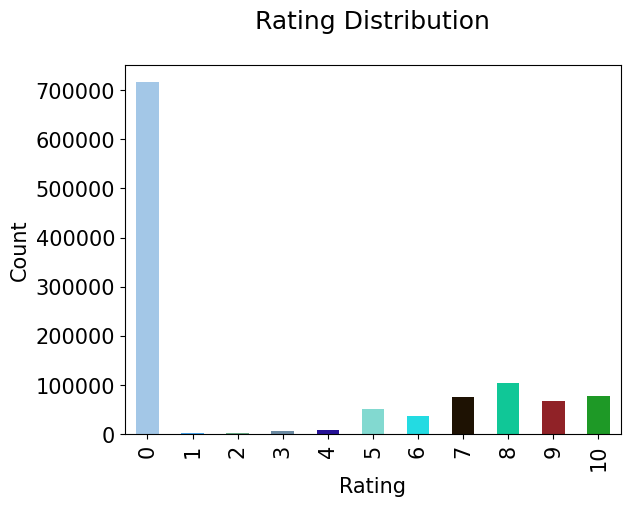

In [ ]:
plt.rc("font", size=15)
unique_ratings = sorted(ratings['rating'].unique())
color_map = np.random.rand(len(unique_ratings), 3)
ratings['rating'].value_counts(sort=False).reindex(unique_ratings).plot(kind='bar', color=color_map)

plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

# Book Dataset

In [ ]:
dat = ff.create_table(books.head())
dat.update_layout(autosize=False,height=200, width = 4400)
dat.show(renderer="colab")

# 3.Data Preprocessing

# Merge the Book and Rating Dataset

### Merge the 'ratings' and 'books' datasets using the common feature 'isbn' to consolidate information, and then select pertinent features such as 'user_id', 'isbn', 'book_title', 'book_author', and 'rating.' Rearrange the merged dataset to create a refined DataFrame tailored for extracting features essential for book recommendations. This process enables the extraction of relevant information for personalized book suggestions based on user ratings and book details

In [ ]:
df = pd.merge(ratings,books,on='isbn')
dat = ff.create_table(df.head())
dat.update_layout(autosize=False,height=200, width = 3990)
dat.show(renderer="colab")

# After Merging the Dataset Show the Columns name and Shape

<ipython-input-50-7ba390af49c3>:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



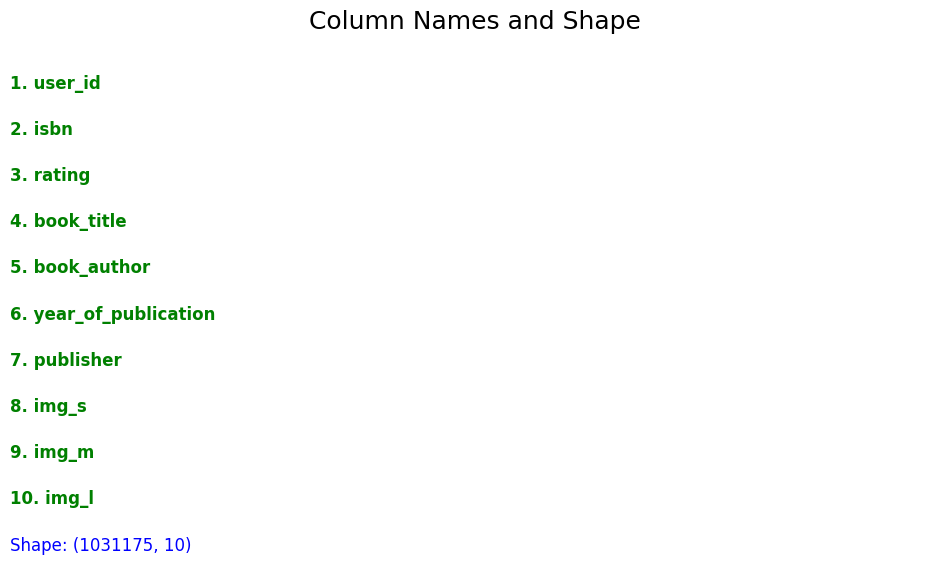

In [ ]:
plt.figure(figsize=(12, 2))

column_names = df.columns
spacing = 0.3

for i, column in enumerate(column_names, 1):
    plt.text(0, 1 - i * spacing, f"{i}. {column}", fontsize=12, fontweight='bold', va='center', ha='left', color='green')

# Add shape information
plt.text(0, 1 - (i + 1) * spacing, f"Shape: {df.shape}", fontsize=12, va='center', ha='left', color='blue')

plt.title("Column Names and Shape")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the result
if duplicate_rows.empty:
    print("No duplicate rows.")
else:
    print("\nDuplicate rows:")
    print(duplicate_rows)

No duplicate rows.


# Showing Top 5% Books

### We processes a DataFrame. It then creates a new DataFrame 'ratings' by calculating the mean rating and total number of ratings for each book. The top 5 books with more than 30.

In [ ]:
df['rating'] = df['rating'].astype(int)
ratings = pd.DataFrame(df.groupby('book_title')['rating'].mean())
ratings['Total_Ratings'] = pd.DataFrame(df.groupby('book_title')['rating'].count())
Top5books = ratings[ratings['Total_Ratings'] > 30].sort_values(by = 'rating', ascending = False)[:5].reset_index()
dat = ff.create_table(Top5books)
dat.update_layout(autosize=False,height=200, width = 1200)
dat.show(renderer="colab")

In [ ]:
dat = ff.create_table(df.head())
dat.update_layout(autosize=False,height=200, width = 3990)
dat.show(renderer="colab")

# Drop Columns

### Remove 'year_of_publication', 'publisher', 'book_author', 'img_s', 'img_m', and 'img_l' columns from the df DataFrame as they hold no significant value for predicting books based on user ratings. This simplification enhances the model's accuracy by focusing on essential features for efficient book recommendations.

In [ ]:
df.drop(['year_of_publication', 'publisher', 'book_author', 'img_s', 'img_m', 'img_l'], axis = 1, inplace = True)

# Show The Table after Drop the columns

In [ ]:
dat = ff.create_table(df.head())
dat.update_layout(autosize=False,height=200, width = 800)
dat.show(renderer="colab")

# Count Total Rating for Each Book

### We groups the DataFrame by 'book_title', 'rating' and adds a new column, 'totalRatingCount,' representing the total number of ratings each book has received. This enables the identification of popular and less popular books based on the count of ratings, providing insights into the relative popularity of different titles in the dataset.

In [ ]:
combine_book_rating = df.dropna(axis = 0, subset = ['book_title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['book_title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['book_title', 'totalRatingCount']]
    )

dat = ff.create_table(book_ratingCount.head())
dat.update_layout(autosize=False,height=200, width = 1200)
dat.show(renderer="colab")

# Combine Total Rating with Rating

### We combined the rating data with total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'book_title', right_on = 'book_title', how = 'left')

dat = ff.create_table(rating_with_totalRatingCount.head())
dat.update_layout(autosize=False,height=200, width = 1200)
dat.show(renderer="colab")

# Dataset Discription

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   241090.000
mean         4.277
std         16.738
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalRatingCount, dtype: float64


# Set Threshold Value

### We create a popularity threshold value 50. So that, from the total rating count set a query, if it is greater than the value only then we can considier it. we consider the books thats have more than 50 ratings and that might have more popular. Those book less than threshold we consider this is less popular and we ignore it.

In [ ]:
threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @threshold')
dat = ff.create_table(rating_popular_book.head())
dat.update_layout(autosize=False,height=200, width = 900)
dat.show(renderer="colab")

# After Combined the features the shape of our Dataframe

In [ ]:
rating_popular_book.shape

(288740, 5)

# 4.Implementing KNN

### kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

### We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

### Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

# Cosine Similarity

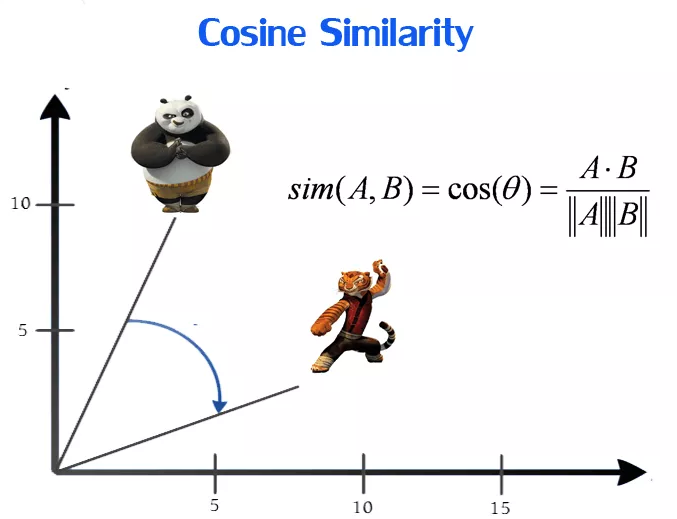


![figure.3](https://www.tigergraph.com/wp-content/uploads/2018/07/Screen-Shot-2018-07-26-at-12.28.13-PM.png)


### In the kNN algorithm, cosine similarity is used to identify neighbors by finding users with similar rating patterns. Users with a higher cosine similarity are considered more similar, and their preferences are used to predict and recommend items, such as books, to a target user. Cosine similarity is advantageous in collaborative filtering as it is not influenced by the magnitude of the vectors, focusing solely on the direction of the vectors in the multi-dimensional space.

# Create Pivot Table

### Initially, duplicate entries in the columns 'user_id', 'book_title', and 'isbn' are removed, resulting in a DataFrame called all_user_rating. Subsequently, the code creates a pivot table named all_user_rating_pivot to reshape the data, indexing it by 'user_id' and using 'book_title' and 'isbn' as columns. The 'rating' values are filled with the mean of duplicate entries. The print statement confirms the absence of null values in the resulting pivot table. This process effectively organizes user ratings for popular books, ensuring that each user and book pair has a unique entry with mean ratings, and prepares the data for further analysis or modeling.

In [ ]:
all_user_rating = rating_popular_book.drop_duplicates(['user_id', 'book_title', 'isbn'])

# Handle duplicates by taking the mean of duplicate entries
all_user_rating_pivot = all_user_rating.pivot_table(index='user_id', columns=['book_title', 'isbn'], values='rating', aggfunc='mean')


# Show the Pivot Table

In [ ]:
all_user_rating_pivot

book_title 10 Lb. Penalty            16 Lighthouse Road       1984             \
isbn           0399143025 0515123471         1551668300 0151660387 0451519841   
user_id                                                                         
100001                NaN        NaN                NaN        NaN        NaN   
100002                NaN        NaN                NaN        NaN        NaN   
100004                NaN        NaN                NaN        NaN        NaN   
100009                NaN        NaN                NaN        NaN        NaN   
10001                 NaN        NaN                NaN        NaN        NaN   
...                   ...        ...                ...        ...        ...   
99980                 NaN        NaN                NaN        NaN        NaN   
99982                 NaN        NaN                NaN        NaN        NaN   
99992                 NaN        NaN                NaN        NaN        NaN   
99996                 NaN        NaN                NaN        NaN        NaN   
99997                 NaN        NaN                NaN        NaN        NaN   

book_title                                                         ...  \
isbn       0451524934 0452262933 0582060184 207036822X 8423328651  ...   
user_id                                                            ...   
100001            NaN        NaN        NaN        NaN        NaN  ...   
100002            NaN        NaN        NaN        NaN        NaN  ...   
100004            NaN        NaN        NaN        NaN        NaN  ...   
100009            NaN        NaN        NaN        NaN        NaN  ...   
10001             NaN        NaN        NaN        NaN        NaN  ...   
...               ...        ...        ...        ...        ...  ...   
99980             NaN        NaN        NaN        NaN        NaN  ...   
99982             NaN        NaN        NaN        NaN        NaN  ...   
99992             NaN        NaN        NaN        NaN        NaN  ...   
99996             NaN        NaN        NaN        NaN        NaN  ...   
99997             NaN        NaN        NaN        NaN        NaN  ...   

book_title Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
isbn                                                              0060958324   
user_id                                                                        
100001                                                    NaN                  
100002                                                    NaN                  
100004                                                    NaN                  
100009                                                    NaN                  
10001                                                     NaN                  
...                                                       ...                  
99980                                                     NaN                  
99982                                                     NaN                  
99992                                                     NaN                  
99996                                                     NaN                  
99997                                                     NaN                  

book_title                             Zoya            \O\" Is for Outlaw"  \
isbn       0553277472 0688171664 0385296495 0440203856          0449003787   
user_id                                                                      
100001            NaN        NaN        NaN        NaN                 NaN   
100002            NaN        NaN        NaN        NaN                 NaN   
100004            NaN        NaN        NaN        NaN                 NaN   
100009            NaN        NaN        NaN        NaN                 NaN   
10001             NaN        NaN        NaN        NaN                 NaN   
...               ...        ...        ...        ...                 ...   
99980

In [ ]:
all_user_rating = rating_popular_book.drop_duplicates(['user_id', 'book_title', 'isbn'])

# Handle duplicates by taking the mean of duplicate entries
all_user_rating_pivot = all_user_rating.pivot_table(index='user_id', columns=['book_title', 'isbn'], values='rating', aggfunc='mean').fillna(0)

print('No null values now..')

No null values now..


In [ ]:
all_user_rating_pivot

book_title 10 Lb. Penalty            16 Lighthouse Road       1984             \
isbn           0399143025 0515123471         1551668300 0151660387 0451519841   
user_id                                                                         
100001              0.000      0.000              0.000      0.000      0.000   
100002              0.000      0.000              0.000      0.000      0.000   
100004              0.000      0.000              0.000      0.000      0.000   
100009              0.000      0.000              0.000      0.000      0.000   
10001               0.000      0.000              0.000      0.000      0.000   
...                   ...        ...                ...        ...        ...   
99980               0.000      0.000              0.000      0.000      0.000   
99982               0.000      0.000              0.000      0.000      0.000   
99992               0.000      0.000              0.000      0.000      0.000   
99996               0.000      0.000              0.000      0.000      0.000   
99997               0.000      0.000              0.000      0.000      0.000   

book_title                                                         ...  \
isbn       0451524934 0452262933 0582060184 207036822X 8423328651  ...   
user_id                                                            ...   
100001          0.000      0.000      0.000      0.000      0.000  ...   
100002          0.000      0.000      0.000      0.000      0.000  ...   
100004          0.000      0.000      0.000      0.000      0.000  ...   
100009          0.000      0.000      0.000      0.000      0.000  ...   
10001           0.000      0.000      0.000      0.000      0.000  ...   
...               ...        ...        ...        ...        ...  ...   
99980           0.000      0.000      0.000      0.000      0.000  ...   
99982           0.000      0.000      0.000      0.000      0.000  ...   
99992           0.000      0.000      0.000      0.000      0.000  ...   
99996           0.000      0.000      0.000      0.000      0.000  ...   
99997           0.000      0.000      0.000      0.000      0.000  ...   

book_title Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
isbn                                                              0060958324   
user_id                                                                        
100001                                                  0.000                  
100002                                                  0.000                  
100004                                                  0.000                  
100009                                                  0.000                  
10001                                                   0.000                  
...                                                       ...                  
99980                                                   0.000                  
99982                                                   0.000                  
99992                                                   0.000                  
99996                                                   0.000                  
99997                                                   0.000                  

book_title                             Zoya            \O\" Is for Outlaw"  \
isbn       0553277472 0688171664 0385296495 0440203856          0449003787   
user_id                                                                      
100001          0.000      0.000      0.000      0.000               0.000   
100002          0.000      0.000      0.000      0.000               0.000   
100004          0.000      0.000      0.000      0.000               0.000   
100009          0.000      0.000      0.000      0.000               0.000   
10001           0.000      0.000      0.000      0.000               0.000   
...               ...        ...        ...        ...                 ...   
99980

# Create a Sparse Matrix

### Converts the DataFrame all_user_rating_pivot into a sparse matrix named all_user_rating_matrix using the csr_matrix function. This transformation is crucial for efficient storage and manipulation of the data, especially when dealing with a large number of users and books. The resulting sparse matrix represents the user ratings for books, with each row corresponding to a user and each column corresponding to a specific book. The print statement confirms the successful creation of the sparse matrix. This approach is commonly used in collaborative filtering techniques for recommendation systems, where the sparsity of user-item interactions is addressed to optimize computational efficiency.

In [ ]:
all_user_rating_matrix = csr_matrix(all_user_rating_pivot.values)
print('Sparse matrix created..')

Sparse matrix created..


# Training Our Model

### Nearest Neighbors model (model_knn) for collaborative filtering using the cosine similarity metric and the 'brute' force algorithm. It then trains the model on user ratings stored in the sparse matrix all_user_rating_pivot.values. This model is prepared for making collaborative recommendations based on user similarity.We will compute the nearest neigbors using Brute algorithm and we specify metric as a cosine, so that the algorithm will calculate the cosine similarity between the rating vectors. Fitting the model.

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(all_user_rating_pivot.values)

NearestNeighbors(algorithm='brute', metric='cosine')

# 5.Testing Recommendation

### We take the User Id as a Input and based on k-nearest neighbor average rating, We Show Top 10 Books.

In [ ]:
def recommend_books_by_user(user_id, model_knn, all_user_rating_pivot, all_user_rating, k=10):
    if user_id not in all_user_rating_pivot.index:
        print(f"User ID {user_id} not found in the pivot table.")
        return None

    user_ratings = all_user_rating_pivot.loc[user_id].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(user_ratings, n_neighbors=k + 1)

    recommended_books_indices = indices.flatten()[1:]

    valid_indices = [idx for idx in recommended_books_indices if idx < len(all_user_rating_pivot.index)]

    recommended_books_user_ids = all_user_rating_pivot.index[valid_indices]

    recommended_books_with_ratings = all_user_rating[all_user_rating['user_id'].isin(recommended_books_user_ids)][['book_title', 'rating']]

    top_10_books_with_ratings = recommended_books_with_ratings.groupby('book_title')['rating'].mean().sort_values(ascending=False).head(10)

    return top_10_books_with_ratings



Top-10 recommended books for user-10314:
1. The Red Tent (Bestselling Backlist) - Rating: 8.25
2. Slammerkin - Rating: 8.00
3. Me Talk Pretty One Day - Rating: 8.00
4. Back Roads - Rating: 8.00
5. The Liar's Club: A Memoir - Rating: 8.00
6. Cold Mountain : A Novel - Rating: 8.00
7. Little Altars Everywhere: A Novel - Rating: 7.50
8. Good in Bed - Rating: 7.50
9. The Pilot's Wife : A Novel - Rating: 7.33
10. In Her Shoes : A Novel - Rating: 7.00


<ipython-input-32-7b54594ca1d3>:6: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-32-7b54594ca1d3>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-32-7b54594ca1d3>:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



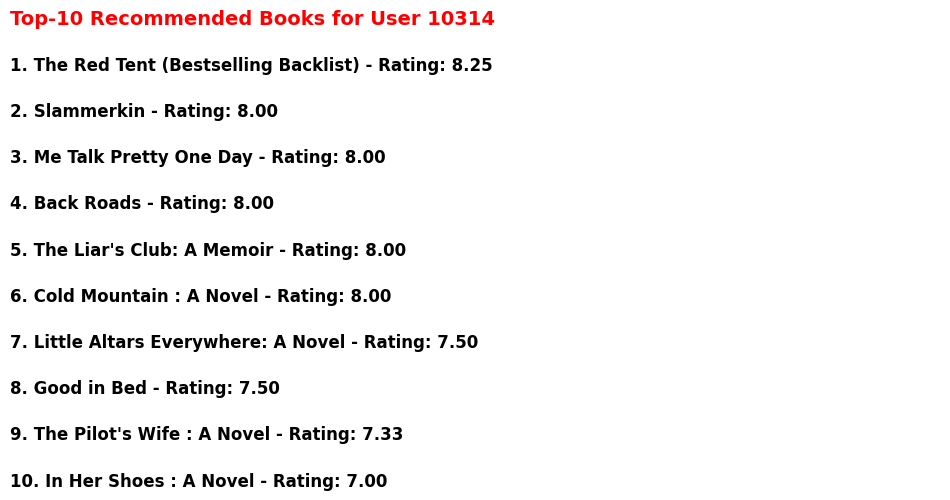

In [ ]:

user_id_example = '10314'

recommended_books_user = recommend_books_by_user(user_id_example, model_knn, all_user_rating_pivot, all_user_rating, k=10)

print(f"Top-10 recommended books for user-{user_id_example}:")
for i, (book, rating) in enumerate(recommended_books_user.iteritems(), start=1):
    print(f"{i}. {book} - Rating: {rating:.2f}")

plt.figure(figsize=(12, 2))

spacing = 0.3

plt.text(0, 1, f"Top-10 Recommended Books for User {user_id_example}", fontsize=14, fontweight='bold', va='center', ha='left', color='red')

for i, (book, rating) in enumerate(recommended_books_user.iteritems(), 1):
    plt.text(0, 1 - i * spacing, f"{i}. {book} - Rating: {rating:.2f}", fontsize=12, fontweight='bold', va='center', ha='left', color='black')

plt.axis('off')
plt.tight_layout()
plt.show()


Top-10 recommended books for user 6543:
1. Women of the Silk : A Novel - Rating: 10.00
2. The Secret Life of Bees - Rating: 10.00
3. Roses Are Red (Alex Cross Novels) - Rating: 10.00
4. Imajica - Rating: 10.00
5. Lamb : The Gospel According to Biff, Christ's Childhood Pal - Rating: 10.00
6. The Five People You Meet in Heaven - Rating: 8.50
7. These High, Green Hills (The Mitford Years) - Rating: 8.33
8. Wicked: The Life and Times of the Wicked Witch of the West - Rating: 8.33
9. Out to Canaan (The Mitford Years) - Rating: 8.00
10. One for the Money (Stephanie Plum Novels (Paperback)) - Rating: 8.00


<ipython-input-33-9e965f4274be>:6: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-33-9e965f4274be>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-33-9e965f4274be>:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



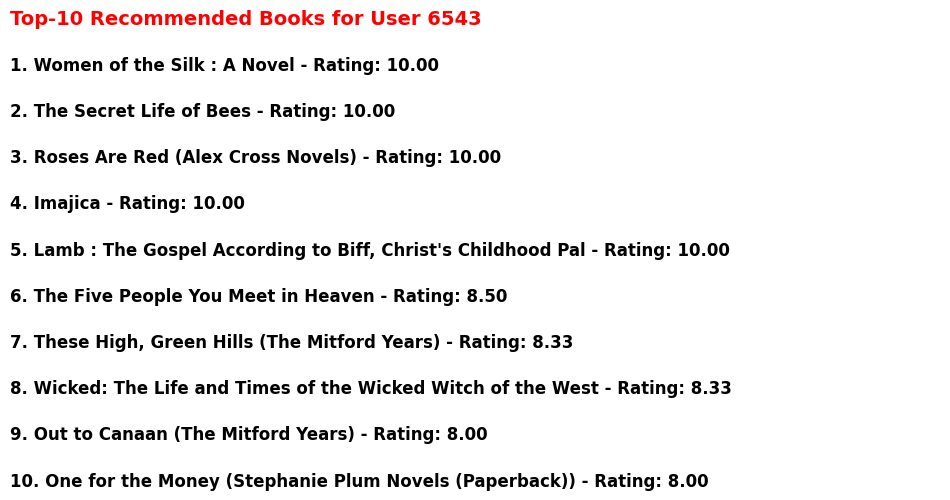

In [ ]:

user_id_example = '6543'

recommended_books_user = recommend_books_by_user(user_id_example, model_knn, all_user_rating_pivot, all_user_rating, k=10)

print(f"Top-10 recommended books for user {user_id_example}:")
for i, (book, rating) in enumerate(recommended_books_user.iteritems(), start=1):
    print(f"{i}. {book} - Rating: {rating:.2f}")

plt.figure(figsize=(12, 2))

spacing = 0.3

plt.text(0, 1, f"Top-10 Recommended Books for User {user_id_example}", fontsize=14, fontweight='bold', va='center', ha='left', color='red')

for i, (book, rating) in enumerate(recommended_books_user.iteritems(), 1):
    plt.text(0, 1 - i * spacing, f"{i}. {book} - Rating: {rating:.2f}", fontsize=12, fontweight='bold', va='center', ha='left', color='black')

plt.axis('off')
plt.tight_layout()
plt.show()


### We take input User ID and ISBN and for showing the rating of that Book

In [ ]:
def get_book_rating_for_user(user_id, isbn, all_user_rating):
    # Find the rating for the specified user and book (ISBN)
    rating = all_user_rating.loc[(all_user_rating['user_id'] == user_id) & (all_user_rating['isbn'] == isbn), 'rating'].values
    if len(rating) > 0:
        return rating[0]
    else:
        print(f"No rating found for user {user_id} and book ISBN {isbn}.")
        return None



In [ ]:
user_id_example = '638'
isbn_example = '0316789089'

book_rating = get_book_rating_for_user(user_id_example, isbn_example, all_user_rating)

print(f"Rating for user {user_id_example} and book ISBN {isbn_example}: {book_rating}")

Rating for user 638 and book ISBN 0316789089: 10


In [ ]:
user_id_example = '638'
isbn_example = '0446520802'

book_rating = get_book_rating_for_user(user_id_example, isbn_example, all_user_rating)

print(f"Rating for user {user_id_example} and book ISBN {isbn_example}: {book_rating}")

Rating for user 638 and book ISBN 0446520802: 0


# Checking is our reccomendation

### Here we can see the user Id '638' and ISBN '0446520802' have Zero rating and another input user Id '638' and ISBN '0316789089' have ten rating. Our testing result also predict same.

# 7.Conclusion

### In conclusion, the k-Nearest Neighbors (kNN) model in our book recommendation system effectively predicts and recommends books based on user ratings. Employing collaborative filtering, the model identifies users with similar preferences, enhancing prediction accuracy and delivering personalized book suggestions. The system's adaptability, scalability, and user-friendly interface contribute to its success in providing meaningful and relevant recommendations, fostering user engagement. Overall, the positive outcomes affirm the effectiveness of the kNN approach in creating a robust, user-centric book recommendation system, aligning with the system's goal of optimizing prediction accuracy and enhancing the overall user experience.